In [1]:
import matplotlib
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

fontpath = '../bigdata anlysis II/src/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
matplotlib.font_manager._rebuild()

### 회귀분석이란?
 - 독립변수(X)와 종속변수(Y) 간의 관계를 찾아내는 것이다.
 - 방정식의 계수 w와 b를 잘 정하는 것으로 표현할 수 있다.

# Step1. 탐색: 프로야구 연봉 데이터 살펴보기

#### * 프로야구 연봉 데이터셋의 기초정보 출력하기

In [2]:
import pandas as pd
import numpy as np

pitcher_file_path = "data/picher_stats_2017.csv" # 던지는 사람
batter_file_path = "data/batter_stats_2017.csv" # 치는 사람

pitcher = pd.read_csv(pitcher_file_path)
batter = pd.read_csv(batter_file_path)

pitcher.head(3)

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000


In [3]:
print(pitcher.columns); print();
print(pitcher.shape)

Index(['선수명', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)'],
      dtype='object')

(152, 22)


- 데이터셋은 총 152개이며, 22개의 feature로 구성되어 있다.

In [4]:
batter.head(3)

,선수명,팀명,경기,타석,타수,안타,홈런,득점,타점,볼넷,...,도루,BABIP,타율,출루율,장타율,OPS,wOBA,WAR,연봉(2018),연봉(2017)
0,최정,SK,130,527,430,136,46,89,113,70,...,1,0.316,0.316,0.427,0.684,1.111,0.442,7.30,120000,120000
1,최형우,KIA,142,629,514,176,26,98,120,96,...,0,0.362,0.342,0.450,0.576,1.026,0.430,7.20,150000,150000
2,박건우,두산,131,543,483,177,20,91,78,41,...,20,0.39,0.366,0.424,0.582,1.006,0.424,7.04,37000,19500


#### * 연봉에 대한 정보

In [5]:
print("pitcher의 연봉(2018)")
print(pitcher['연봉(2018)'].describe()); print()

print("batter의 연봉(2018)")
print(batter['연봉(2018)'].describe())

pitcher의 연봉(2018)
count       152.000000
mean      18932.236842
std       30940.732924
min        2700.000000
25%        4000.000000
50%        7550.000000
75%       18500.000000
max      230000.000000
Name: 연봉(2018), dtype: float64

batter의 연봉(2018)
count       191.000000
mean      20625.654450
std       31978.855209
min        2700.000000
25%        4200.000000
50%        7500.000000
75%       25000.000000
max      250000.000000
Name: 연봉(2018), dtype: float64


<AxesSubplot:title={'center':"batter's pay(2018)"}>

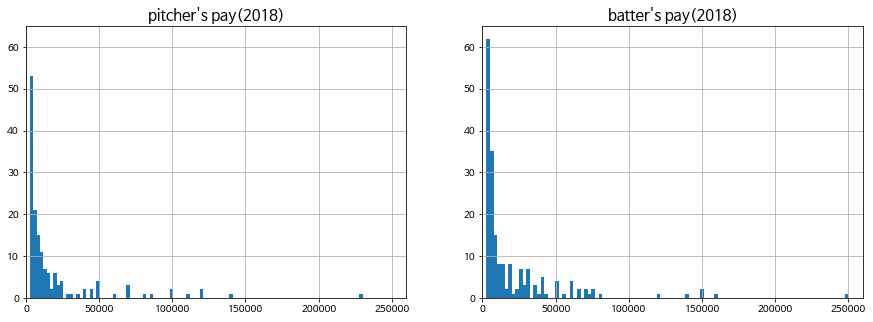

In [6]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.ylim(0,65); plt.xlim(0,260000)
plt.title("pitcher's pay(2018)", fontsize=15)
pitcher['연봉(2018)'].hist(bins=100)

plt.subplot(1,2,2)
plt.ylim(0,65); plt.xlim(0,260000)
plt.title("batter's pay(2018)", fontsize=15)
batter['연봉(2018)'].hist(bins=100)

<AxesSubplot:title={'center':"batter's pay(2018)"}>

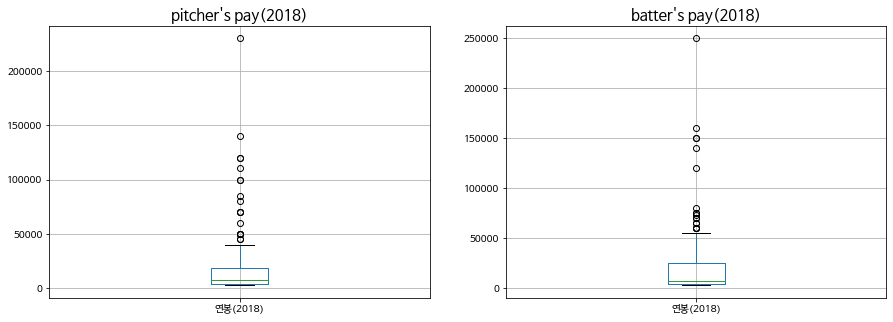

In [7]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.title("pitcher's pay(2018)", fontsize=15)
pitcher.boxplot(column=['연봉(2018)'])

plt.subplot(1,2,2)
plt.title("batter's pay(2018)", fontsize=15)
batter.boxplot(column=['연봉(2018)'])

- 연봉의 분포를 살펴보았을 때, '수십억대 연봉'을 받는 프로 선수는 별로 많지 않으며 5억원 미만의 연봉이 일반적인 것으로 보인다. (단위:만 원)

#### * 회귀 분석에 사용할 피처 알아보기
- 선수명과 팀명과 같은 그래프로 표현할 수 없는 feature를 제외하고 모든 수치형 분포에 대한 시각화를 진행한다.

In [8]:
pitcher.columns

Index(['선수명', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)'],
      dtype='object')

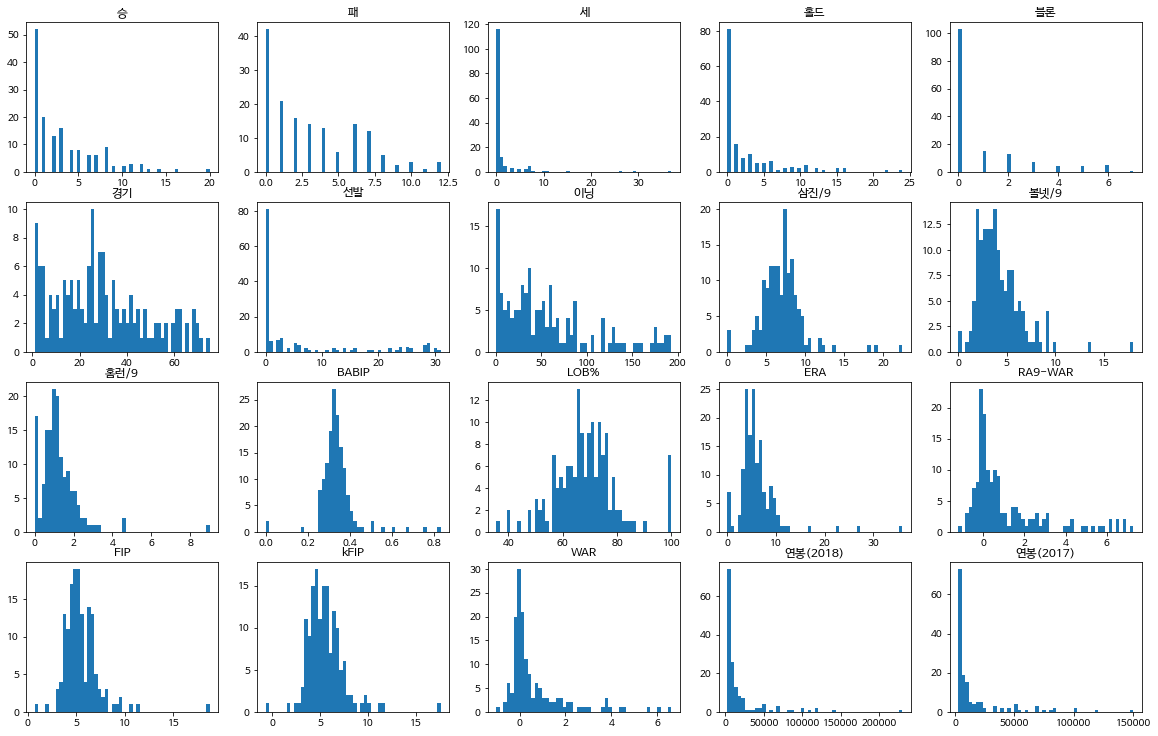

In [9]:
df_pitcher_features = pitcher[['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)']]

def plot_hist_each_column(df):
    plt.rcParams['figure.figsize'] = [20, 16]
    fig = plt.figure(1)
    
    for i in range(len(df.columns)):
        ax = fig.add_subplot(5,5,i+1)
        plt.hist(df[df.columns[i]], bins=50)
        ax.set_title(df.columns[i])
    plt.show()
    
plot_hist_each_column(df_pitcher_features)

- 몇명 feature는 불균형한 분포를 가지고 있는 것으로 알고 있다.
- '홈런/9' feature의 x축 범위는 0 ~ 8 사이인 반면, '이닝' feature의 x축 범위는 0 ~ 200 사이로 각 feature 간의 단위가 다르다.  
따라서 feature의 정규화 또는 스케일링이 필요하다.

### feature의 정규화
- ex) 키와 몸무게를 통한 나이를 예측하는 회귀 분석  
같은 단위라고 할 때 키가 몸무게보다 값이 크므로 키를 나타내는 상수에 따라 나이가 더 큰 영향을 받을 수 있다.  
따라서, 키를 0 ~ 1 사이의 값으로 표현하고, 몸무게도 0 ~ 1 사이의 값으로 표현하는 feature Scaling이 필요하다.
- feature Scaling  
feature들의 단위를 0 ~ 1사이 혹은 상대적 값을 표현할 수 있는 수치로 맞춰주는 것이 피처 스케일링이다.

# Step2. 예측: 투수의 연봉 예측하기

In [10]:
pitcher.head(5)

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000


#### feature Scaling 방법: 표준화
- 표준화는 정규 분포에서 z-값을 구하는 과정과 동일하다.
- z-값은 ((X)-(X의 평균))/X의 표준편차

#### * feature들의 단위 맞추기: feature Scaling

In [11]:
pd.options.mode.chained_assignment = None
# pandas 형태로 정의된 데이터를 출력할 때, scientific-notation이 아닌 float 모양으로 출력되게 해준다.

# feature 각각에 대한 Scaling을 수행하는 함수를 정의한다.
def standard_Scaling(df, scale_columns):
    for col in scale_columns:
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x: (x - series_mean)/series_std)
    return df

scale_columns = ['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '연봉(2017)'] # '연봉(2018)'는 y값

df_pitcher = standard_Scaling(pitcher, scale_columns)
df_pitcher = df_pitcher.rename(columns={'연봉(2018)':'y'})
df_pitcher.head(5)

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,y,연봉(2017)
0,켈리,SK,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,...,-0.442382,0.016783,0.446615,-0.587056,3.174630,-0.971030,-1.058125,4.503142,140000,2.734705
1,소사,LG,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,...,-0.668521,-0.241686,-0.122764,-0.519855,3.114968,-1.061888,-1.073265,4.094734,120000,1.337303
2,양현종,KIA,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,...,-0.412886,-0.095595,0.308584,-0.625456,2.973948,-0.837415,-0.866361,3.761956,230000,5.329881
3,차우찬,LG,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,...,-0.186746,-0.477680,0.558765,-0.627856,2.740722,-0.698455,-0.760385,2.998081,100000,3.333592
4,레일리,롯데,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,...,-0.294900,-0.196735,0.481122,-0.539055,2.751570,-0.612941,-0.619085,2.809003,111000,2.734705


#### 범주형 변수 정규화: 원-핫 인코딩
- pandas에서는 get_dummies()라는 함수로 간단하게 적용 가능

#### * feature들의 단위 맞춰주기: 원-핫 인코딩

In [12]:
team_encoding = pd.get_dummies(df_pitcher['팀명'])
df_pitcher = df_pitcher.drop('팀명', axis = 1)
df_pitcher = df_pitcher.join(team_encoding)
team_encoding.head(5)

,KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0


In [13]:
df_pitcher.head(5)

,선수명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,...,연봉(2017),KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,켈리,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,0.672099,...,2.734705,0,0,0,0,1,0,0,0,0
1,소사,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,0.134531,...,1.337303,0,0,1,0,0,0,0,0,0
2,양현종,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,0.109775,...,5.329881,1,0,0,0,0,0,0,0,0
3,차우찬,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,0.350266,...,3.333592,0,0,1,0,0,0,0,0,0
4,레일리,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,0.155751,...,2.734705,0,0,0,0,0,0,1,0,0


#### * 회귀 분석을 위한 학습, 테스트 데이터셋 분리

In [14]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# 8:2 비율로 학습 데이터와 테스트 데이터로 분리
X = df_pitcher[df_pitcher.columns.difference(['선수명', 'y'])] # dataframe.columns.differnce([]): 제외할 column
y = df_pitcher['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

#### * 회귀 분석 계수 학습 & 학습된 계수 출력

In [15]:
# 회귀 분석 계수를 학습한다. (회귀 모델 학습)
lr = linear_model.LinearRegression() # model object 선언
model = lr.fit(X_train, y_train) # 학습

# 학습된 계수 출력
print(lr.coef_)

[ -1481.01733901   -416.68736601 -94136.23649209  -1560.86205158
   1572.00472193   -747.04952389  -1375.53830289   -523.54687556
   3959.10653661    898.37638984  10272.48746451  77672.53804469
  -2434.38947427   -892.11801281    449.91117164   7612.15661812
   1271.04500059  -2810.5564514    5396.97279896  -4797.30275904
   -250.69773139    236.02530053  19130.59021357    854.02604585
   1301.61974637   3613.84063182   -935.07281796  18144.60099745]


# Step3. 평가: 예측 모델 평가하기

#### * 어떤 feature가 가장 영향력이 강한 feature일까
- 위에서 회귀 분석을 sklearn의 linear_model.LinearRegression()으로 수행했지만,  
statsmodel의 OLS 클래스로도 회귀 분석이 가능하고 summary() 함수를 사용하면  
계수에 대한 분석 내용을 자세하게 살펴볼 수 있다.

In [16]:
import statsmodels.api as sm

# statsmode 라이브러리로 회귀 분석 수행
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     44.19
Date:                Thu, 27 May 2021   Prob (F-statistic):           7.70e-42
Time:                        21:33:38   Log-Likelihood:                -1247.8
No. Observations:                 121   AIC:                             2552.
Df Residuals:                      93   BIC:                             2630.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.678e+04    697.967     24.036      0.000    1.54e+04    1.82e+04
BABIP      -1481.0173   1293.397     -1.145      0.255   -4049.448    1087.414
ERA         -416.6874   2322.402     -0.179      0.858   -5028.517    4195.143
FIP        -9.414e+04   9.43e+04     -0.998      0.321   -2.81e+05    9.31e+04
KIA          303.1852   2222.099      0.136      0.892   -4109.462    4715.833
KT          3436.0520   2133.084      1.611      0.111    -799.831    7671.935
LG          1116.9978   2403.317      0.465      0.643   -3655.513    5889.509
LOB%       -1375.5383   1564.806     -0.879      0.382   -4482.933    1731.857
NC          1340.5004   2660.966      0.504      0.616   -3943.651    6624.652
RA9-WAR     3959.1065   2931.488      1.351      0.180   -1862.247    9780.460
SK          2762.4237   2243.540      1.231      0.221   -1692.803    7217.650
WAR         1.027e+04   2532.309      4.057      0.000    5243.823    1.53e+04
kFIP        7.767e+04   7.95e+04      0.977      0.331   -8.03e+04    2.36e+05
경기         -2434.3895   2953.530     -0.824      0.412   -8299.515    3430.736
두산           971.9293   2589.849      0.375      0.708   -4170.998    6114.857
롯데          2313.9585   2566.009      0.902      0.370   -2781.627    7409.544
볼넷/9        7612.1566   6275.338      1.213      0.228   -4849.421    2.01e+04
블론          1271.0450   1242.128      1.023      0.309   -1195.576    3737.666
삼성          -946.5092   2482.257     -0.381      0.704   -5875.780    3982.762
삼진/9        5396.9728   7286.221      0.741      0.461   -9072.019    1.99e+04
선발         -4797.3028   5489.352     -0.874      0.384   -1.57e+04    6103.463
세           -250.6977   1295.377     -0.194      0.847   -2823.059    2321.663
승            236.0253   2215.264      0.107      0.915   -4163.049    4635.100
연봉(2017)    1.913e+04   1270.754     15.055      0.000    1.66e+04    2.17e+04
이닝           854.0260   6623.940      0.129      0.898   -1.23e+04     1.4e+04
패           1301.6197   1935.935      0.672      0.503   -2542.763    5146.003
한화          5477.8879   2184.273      2.508      0.014    1140.355    9815.421
홀드          -935.0728   1637.923     -0.571      0.569   -4187.663    2317.518
홈런/9        1.814e+04   1.68e+04      1.082      0.282   -1.52e+04    5.14e+04
==============================================================================
Omnibus:                       28.069   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.274
Skew:                          -0.405   Prob(JB):                     6.52e-43
Kurtosis:                       9.155   Cond. No.                     3.58e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

- R-squared(결정 계수) or Adj.R-squared(수정 결정 계수)  
: 회귀 분석이 얼마나 잘 되었는지 평가하는 지표  
: 회귀 분석으로 추정한 모델이 주어진 데이터를 얼마나 잘 설명했는가?에 대한 점수  
: 1에 가까울수록 데이터를 잘 설명하는 모델이라 할 수 있다.

- F-statistic(F 통계량) & Prob(F-statistic)  
: Prob(F-statistic): F-통계량에 대한 p-value  
: p-value < 0.05 이하 일 때, 'F 통계량이 유의한 의미를 가진다'라는 결론을 낼 수 있다.  
: 이러한 결론의 의미는 회귀 분석이 유의미한 결과를 가진다는 것이다.

- P > |t|  
: 각 feature의 F-statistic(F 통계량)이 얼마나 유의미한지에 대한 p-value를 나타내는 것이다.  

> 따라서 위 분석을 통해서는 'WAR', '연봉(2017), '한화' 이 3개의 feature의 p-value가  
0.05 미만으로 나타났기 때문에 회귀 분석에 유의미한 feature들이라는 결론을 내릴 수 있습니다.

#### * 지금까지 학습한 coef(계수) 시각화하기

([<matplotlib.axis.XTick at 0x20ba099ad30>,
 [Text(0, 0, 'const'),
  Text(1, 0, 'BABIP'),
  Text(2, 0, 'ERA'),
  Text(3, 0, 'FIP'),
  Text(4, 0, 'KIA'),
  Text(5, 0, 'KT'),
  Text(6, 0, 'LG'),
  Text(7, 0, 'LOB%'),
  Text(8, 0, 'NC'),
  Text(9, 0, 'RA9-WAR'),
  Text(10, 0, 'SK'),
  Text(11, 0, 'WAR'),
  Text(12, 0, 'kFIP'),
  Text(13, 0, '경기'),
  Text(14, 0, '두산'),
  Text(15, 0, '롯데'),
  Text(16, 0, '볼넷/9'),
  Text(17, 0, '블론'),
  Text(18, 0, '삼성'),
  Text(19, 0, '삼진/9'),
  Text(20, 0, '선발'),
  Text(21, 0, '세'),
  Text(22, 0, '승'),
  Text(23, 0, '연봉(2017)'),
  Text(24, 0, '이닝'),
  Text(25, 0, '패'),
  Text(26, 0, '한화'),
  Text(27, 0, '홀드'),
  Text(28, 0, '홈런/9')])

C:\Users\ma221\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ma221\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


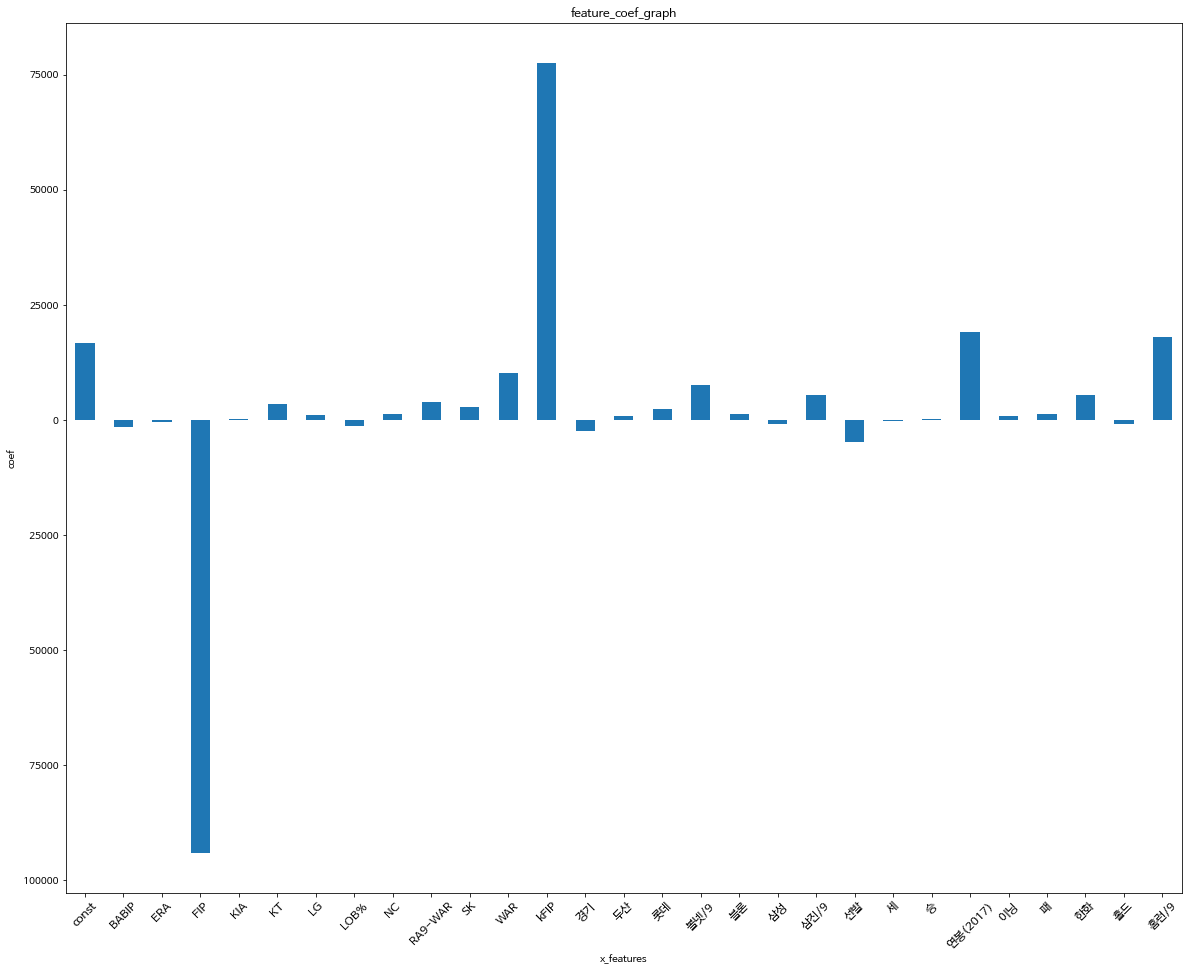

In [17]:
plt.rcParams['figure.figsize'] = [20, 16]

# 회귀 계수를 list로 반환
coefs = model.params.to_list()
coefs_series = pd.Series(coefs)

# 변수명을 list로 반환
x_labels = model.params.index.to_list()

# 회귀 계수를 출력

ax = coefs_series.plot(kind='bar')
ax.set_title('feature_coef_graph')
ax.set_xlabel('x_features')
ax.set_ylabel('coef')
plt.xticks(np.arange(0, len(x_labels), step=1), x_labels, rotation =45, fontsize =12)

- FIP, WAR, 홈런, 연봉(2017) feature가 가장 영향력이 큰 것으로 볼 수 있다

###  따라서, feature 탐색 결과 1) 유의미한 feature인지 2) 영향력이 큰 feature인지 알 수 있다.

#### * 예측 모델 평가하기 : R2 score

In [18]:
# 학습 데이터와 테스트 데이터로 분리합니다.
X = df_pitcher[df_pitcher.columns.difference(['선수명', 'y'])]
y = df_pitcher['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

# 회귀 분석 모델을 학습
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

# 회귀 분석 모델을 평가
print("학습 데이터 셋에 대한 평가 점수",model.score(X_train, y_train))
print("테스트 데이터 셋에 대한 평가 점수", model.score(X_test, y_test))

학습 데이터 셋에 대한 평가 점수 0.9276949405576705
테스트 데이터 셋에 대한 평가 점수 0.8860171644977815


- 학습 데이터 셋과 테스트 데이터 셋에 대한 평가 점수 차이는 벌어지지 않는 것이 좋다.  
 학습 데이터 셋 점수 >> 데이터 셋 점수: 과적합이 발생한 것  
 

- 회귀 모델을 평가할 때는 RMSE score라는 측정 지표를 활용할 수도 있다.  
RMSE score: 실제값과 예측값의 차이를 절대적인 수치로 나타낸 것  
RMSE score 값이 높으면 높을수록 예측이 부정확하다는 것을 의미

#### * 예측 모델 평가하기 : RMSE score

In [19]:
# 회귀 분석 모델을 평가
y_predict = lr.predict(X_train)
print("train RMSE score",  sqrt(mean_squared_error(y_train, y_predict)))

y_predict = lr.predict(X_test)
print("test RMSE score", sqrt(mean_squared_error(y_test, y_predict)))

train RMSE score 7282.718684746372
test RMSE score 14310.696436889153


In [20]:
df_pitcher.columns

Index(['선수명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9', '볼넷/9',
       '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', 'y',
       '연봉(2017)', 'KIA', 'KT', 'LG', 'NC', 'SK', '두산', '롯데', '삼성', '한화'],
      dtype='object')

#### * feature들의 상관 관계 분석하기

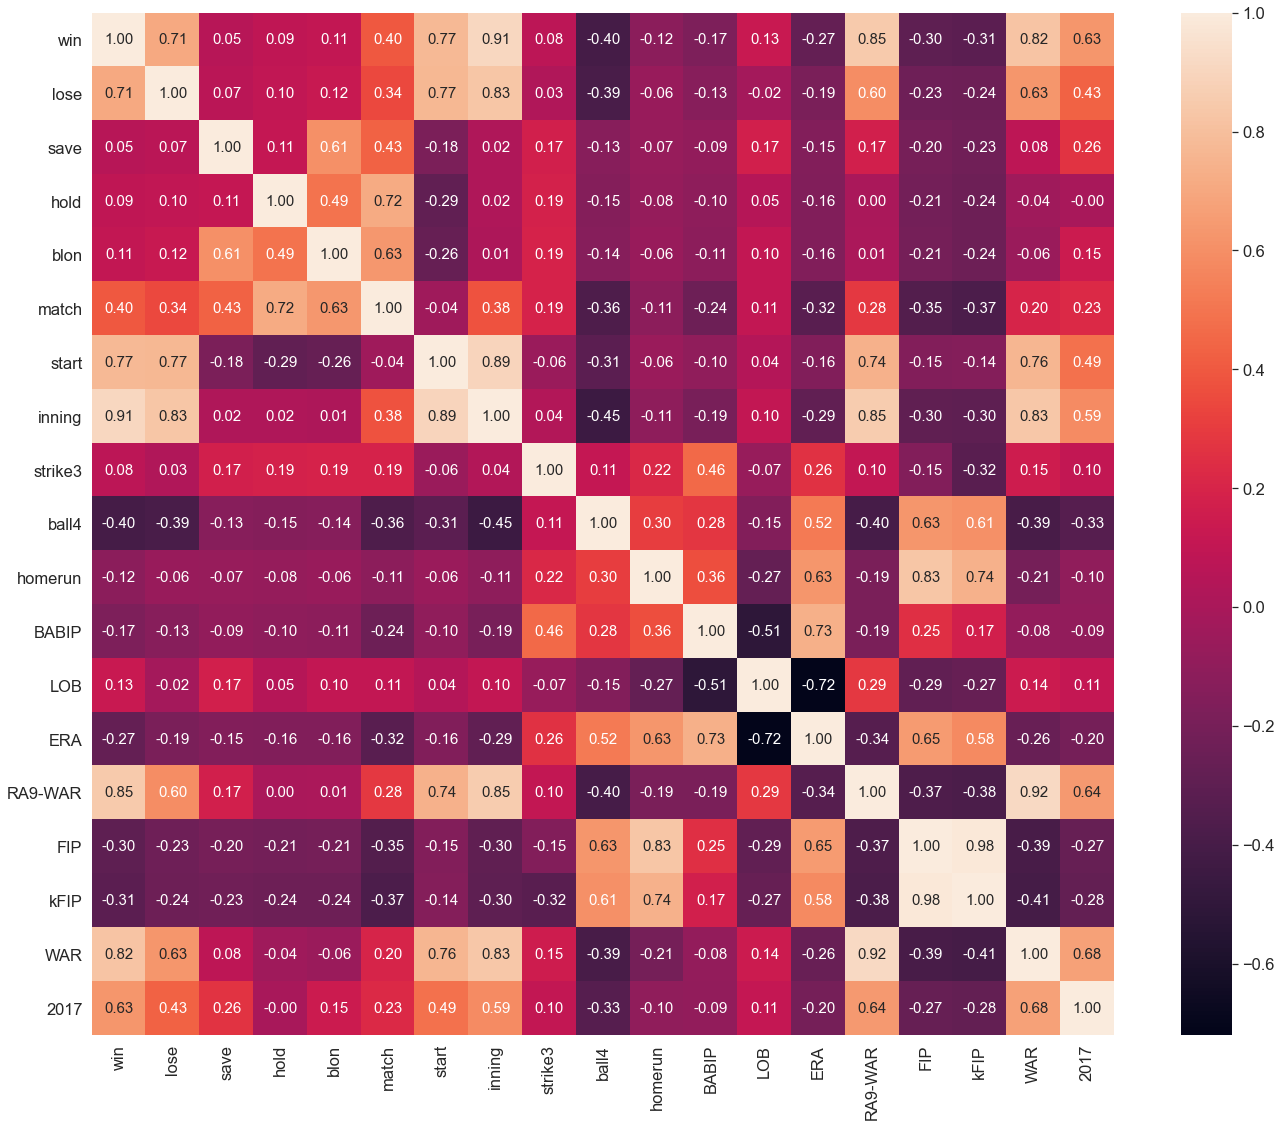

In [21]:
import seaborn  as sns

# feature간의 상관계수 행렬을 계산합니다.
corr = df_pitcher[scale_columns].corr(method='pearson')
show_cols = ['win', 'lose', 'save', 'hold', 'blon', 'match', 'start',
            'inning', 'strike3', 'ball4', 'homerun', 'BABIP', 'LOB',
            'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '2017']

#corr 행렬 heatmap을 시각화합니다.
plt.rc('font', family='NanumGothic')
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':15}, 
                 yticklabels=show_cols, xticklabels=show_cols)
plt.tight_layout()
plt.show()

* 다중 공선성?  
변수 간의 상관 관계가 높아 분석에 부정적인 영향을 미치는 것
  
  
* VIF(분산팽창용인)?  
다중 공선성을 평가할 수 있는 계수로, 10~15가 넘으면 그 feature는 다중 공선성의 문제가 발생했다고 판단한다.

#### * 회귀 분석 예측 성능을 높이기 위한 방법: 다중 공선성 확인

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#feature마다 VIF 계수를 출력합니다.
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] # X = df_pitcher[df_pitcher.columns.difference(['선수명', 'y'])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,3.2,BABIP
1,10.6,ERA
2,14238.3,FIP
3,1.1,KIA
4,1.1,KT
5,1.1,LG
6,4.3,LOB%
7,1.1,NC
8,13.6,RA9-WAR
9,1.1,SK


# Step4. 시각화: 분석 결과 시각화하기

#### * 예측 연봉과 실제 연봉 비교하기

In [23]:
# 2018년 연봉을 예측하여 데이터 프레임의 열로 생성
X = df_pitcher[['FIP', 'WAR', '볼넷/9', '삼진/9', '연봉(2017)']]
pre_salary_2018 = lr.predict(X)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 28 is different from 5)

In [ ]:
X

In [ ]:

df_pitcher['예측연봉(2018)'] = pd.Series(pre_salary_2018)

# 원래의 데이터 프레임을 다시 불러옵니다.
pitcher = pd.read_csv(pitcher_file_path)
pitcher = pitcher[['선수명', '연봉(2017)']] # 굳이 연봉 2017이 왜 들어가는지 모르겠네

In [ ]:
# 원래의 데이터 프레임에 2018년 연봉 정보를 합칩니다.
df_result = df_pitcher.sort_values(by=['y'], ascending=False)
df_result.drop([ '연봉(2017)'], axis=1, inplace=True, errors='ignore')
df_result = df_result[['선수명', 'y', '예측연봉(2018)', '연봉(2017)']]

- 등분산을 가정하는 경우와 가정하지 않는 경우를 다 계산하는 이유  
 등분산일 때와 등분산이 아닐 경우 t-검정 통계량을 계산하는 방식이 달라지기 때문에 보통 t-test 전에 등분산 검정을 한다.  
   
   
- 등분산을 가정한 경우와 가정하지 않은 경우 모두 p-value가 0.000이하로 나타났다.
- 따라서 귀무가설:두 집단의 평균이 같다 -> 기각 -> 아프리카와 유럽 간의 맥주 소비량은 통계적으로 유의미하다.  

=> 그렇지만 여기 두 집단의 데이터 크기도 다르고, 각각의 크기 또한 크지 않기 때문에 실제로 통계적인 의미를 가지는 검정으로   보기는 어렵다.

#### * '대한민국은 얼마나 술을 독하게 마시는 나라일까' 탐색하기

#### * 국가별 술 소비량 대비 알코올 비율을 순위별로 시각화하기